<a href="https://colab.research.google.com/github/fcm1006/CUHK/blob/GISM/GeoSpatialBigData%20/%20Assignment_3_FEY_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Open question] Find the center area of Shanghai

Suppose you need to identify the **center area** of Shanghai by using Mobike data.
You can apply any methods you like to work out the result then plot it in folium with basemap(Gaode)


Here is the full dataset of Mobike:
https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv


Tips:

1. Generate clusters for shared bike data
2. Create nertwork from shared bike data
3. Use network analysis on the shared bike network
4. Identify the center area (color the center area in red/blue(as you like))
5. Explain the flow and the result





# 1. Clustering

## 1.1 Import data and modules

Different clustering algorithm

https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
!pip install sklearn # an important machine learning package

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=d244100e5b847d410a3fb18e12358dbedeaf74ac9f4d70c78c3a9105a5deac48
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN

In [ ]:
# load a mobike data in Shanghai
mobike_df = pd.read_csv('https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv')
mobike_df

orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
102356    NaN  
102357    NaN  
102358    NaN  
102359    NaN  
102360    NaN  

[102361 rows x 10 columns]

## 1.2 Plot base map and OD data

In [ ]:
# plot in map
!pip install folium
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Plot Shanghai as basemap
sh_lat = 31.22 
sh_lng = 121.46
gaode = 'http://wprd03.is.autonavi.com/appmaptile?style=7&x={x}&y={y}&z={z}' 
map_sh = folium.Map(location=[sh_lat,sh_lng],tiles=gaode, attr = 'basemap')
map_sh

In [ ]:
# Plot 1% of the Origin-destination line from mobike data
for index, row in mobike_df.iterrows():
    if index%100 == 0:
    #if index%10 == 0:  #10% OD data
        OD = [
            [row['start_location_y'],row['start_location_x']],
            [row['end_location_y'],row['end_location_x']]]
        
        folium.PolyLine(OD, color='red').add_to(map_sh)
map_sh

In [ ]:
# stack the origin points with destination points
new_ll = []

for index, row in mobike_df.iterrows():
    new_ll.append([row['start_location_y'],row['start_location_x']])
    new_ll.append([row['end_location_y'],row['end_location_x']])

all_pt =pd.DataFrame(data = new_ll, columns = ["y", "x"]) 

# #just plot first 5 rows
all_pt.head(5)

y          x
0  31.38844  121.34860
1  31.38846  121.35731
2  31.27989  121.50808
3  31.27156  121.48925
4  31.25409  121.38256

## 1.3 Generate clusters using DBSCAN method

In [ ]:
# define your parameters, like the radius of cluster
db_mobike = DBSCAN(eps = 0.0005, # ~ 50 meter
                   min_samples = 20).fit(all_pt[['y','x']]) # train the model 

In [ ]:
predict_mobike = db_mobike.fit_predict(all_pt[['y','x']]) # predict by the model
all_pt['label'] = predict_mobike

all_pt

y          x  label
0       31.38844  121.34860     -1
1       31.38846  121.35731     -1
2       31.27989  121.50808    324
3       31.27156  121.48925     -1
4       31.25409  121.38256     -1
...          ...        ...    ...
204717  31.30559  121.39788     -1
204718  31.26882  121.51414     -1
204719  31.27181  121.50941    111
204720  31.26095  121.52049     -1
204721  31.27385  121.51755     77

[204722 rows x 3 columns]

In [ ]:
# assign color for different labels
import random
def random_color(seed):
    random.seed(seed+10)
    return "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])

print(random_color(4435)) # return the same color code for same seed

#2FB3E3


In [ ]:
# check how many clusters we have
np.unique(predict_mobike)

# totally 10 clusters

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [ ]:
for index, row in all_pt.iterrows():
    if row['label']>=0:
      # you can modify your seed percentage
      if random.random()<0.02: # only 2%
        folium.CircleMarker(
            [row['y'],row['x']],
            color = random_color(row['label']),
            radius=3,
            fill=True
        ).add_to(map_sh)

In [ ]:
map_sh

In [ ]:
# assign the cluster to OD points
mobike_df['start_cluster'] = db_mobike.fit_predict(mobike_df[['start_location_y','start_location_x']]) # predict by the model
mobike_df['end_cluster'] = db_mobike.fit_predict(mobike_df[['end_location_y','end_location_x']]) # predict by the model
mobike_df

orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  start_cluster  end_cluster  
0         NaN             -1           -1  
1         NaN             -1           -1  
2         NaN             -1           -1  
3         NaN              0           -1  
4         NaN             -1           -1  
...       ...            ...          ...  
102356    NaN             -1           -1  
102357    NaN             -1           -1  
102358    NaN             -1           -1  
102359    NaN             -1           -1  
102360    NaN             -1           42  

[102361 rows x 12 columns]

In [ ]:
# filter only the od among clusters

mobike_df_cluster = mobike_df.query("start_cluster>=0 and end_cluster>=0")
mobike_df_cluster

orderid  bikeid  userid        start_time  start_location_x  \
10       903987   13745    3117  2016-08-09 19:51         121.51383   
103      401996  190120   10705  2016-08-18 14:19         121.50016   
108     1504315   78807     185  2016-08-16 19:56         121.47998   
164      656877  144426    2567  2016-08-10 20:06         121.48414   
243      914890  122026    6806  2016-08-23 12:10         121.53261   
...         ...     ...     ...               ...               ...   
101855   788033  324054   14436  2016-08-30 09:54         121.53078   
102026   371933  119743    9402  2016-08-10 14:59         121.53256   
102285  1018326   45228    9117  2016-08-23 13:39         121.51325   
102298  1241599  206321   15673  2016-08-27 17:23         121.51484   
102350  1303672   80655    7520  2016-08-17 17:16         121.53213   

        start_location_y          end_time  end_location_x  end_location_y  \
10              31.30629  2016-08-09 19:59       121.50973        31.30368   
103             31.27995  2016-08-18 14:24       121.50114        31.27495   
108             31.31174  2016-08-16 20:04       121.48318        31.30466   
164             31.30630  2016-08-10 20:13       121.47944        31.31052   
243             31.33058  2016-08-23 12:17       121.53350        31.33020   
...                  ...               ...             ...             ...   
101855          31.31458  2016-08-30 10:02       121.52140        31.31666   
102026          31.32382  2016-08-10 15:05       121.53758        31.32769   
102285          31.30227  2016-08-23 13:47       121.51034        31.30677   
102298          31.30759  2016-08-27 17:48       121.53240        31.30517   
102350          31.33081  2016-08-17 17:22       121.53175        31.32203   

        track  start_cluster  end_cluster  
10        NaN              1           24  
103       NaN              7           43  
108       NaN             74            4  
164       NaN              8            7  
243       NaN             85           81  
...       ...            ...          ...  
101855    NaN             16           52  
102026    NaN             13           76  
102285    NaN              2          105  
102298    NaN              1           21  
102350    NaN             85            0  

[740 rows x 12 columns]

In [ ]:
# Plot 100% of the Origin-destination line from mobike data with the cluster

map_sh_2 = folium.Map(location=[sh_lat,sh_lng],tiles=gaode,attr='test')

for index, row in mobike_df_cluster.iterrows():
    if index%1==0:
        OD = [
            [row['start_location_y'],row['start_location_x']],
            [row['end_location_y'],row['end_location_x']]]
        folium.PolyLine(OD,weight=0.5,color = 'red').add_to(map_sh_2)
        
        
        folium.CircleMarker(
            [row['start_location_y'],row['start_location_x']],
            color = random_color(row['start_cluster']),
            radius=3,
            fill=True
        ).add_to(map_sh_2)

        folium.CircleMarker(
            [row['end_location_y'],row['end_location_x']],
            color = random_color(row['end_cluster']),
            radius=3,
            fill=True
        ).add_to(map_sh_2)
        
map_sh_2

In [ ]:
od = dict() # generate empty dict
for index, row in mobike_df_cluster.iterrows(): # loop over each road
  od_idx = (row['start_cluster'], row['end_cluster']) # od_idx is the od index, eg: 2 -> 4
  if od_idx not in od: # if the od idx not in dict
    od[od_idx] = 1 # the dict remains to be 1
  else:
    od[od_idx] += 1 # store the data of od_idx

print(od)

{(1, 24): 5, (7, 43): 3, (74, 4): 28, (8, 7): 14, (85, 81): 1, (57, 11): 20, (23, 4): 12, (12, 33): 7, (82, 33): 3, (0, 67): 8, (16, 90): 3, (13, 64): 10, (36, 4): 1, (36, 11): 1, (16, 33): 3, (13, 90): 5, (62, 36): 2, (13, 76): 11, (16, 41): 4, (55, 24): 1, (4, 2): 4, (80, 39): 1, (10, 38): 25, (86, 33): 1, (37, 4): 10, (49, 27): 4, (11, 30): 2, (45, 8): 2, (85, 0): 14, (8, 63): 21, (24, 5): 2, (52, 10): 2, (41, 45): 1, (17, 63): 1, (34, 18): 1, (4, 49): 1, (67, 43): 1, (59, 101): 3, (2, 55): 5, (41, 55): 1, (80, 33): 1, (2, 77): 6, (13, 81): 12, (57, 3): 2, (98, 11): 6, (59, 34): 6, (52, 26): 1, (40, 10): 2, (108, 58): 1, (16, 52): 8, (2, 33): 3, (23, 45): 1, (61, 42): 2, (67, 25): 1, (15, 47): 3, (27, 13): 1, (53, 11): 2, (60, 27): 1, (72, 4): 1, (64, 21): 3, (70, 77): 1, (59, 26): 1, (1, 55): 2, (8, 75): 4, (4, 57): 2, (60, 8): 3, (79, 12): 1, (0, 7): 2, (25, 85): 6, (2, 24): 11, (21, 86): 1, (24, 50): 1, (34, 13): 1, (59, 97): 1, (72, 79): 1, (37, 26): 1, (5, 11): 2, (16, 27): 2, 

# 2. Network

## 2.1 Create nertwork from shared bike data

In [ ]:
!pip install networkx --user # most important network module
!pip install matplotlib --user
import networkx as nx
import matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read the shared bike data

import pandas as pd

# load a mobike data in Shanghai
mobike_df = pd.read_csv('https://github.com/gyshion/tutorial/raw/main/mobike_shanghai1.csv')
mobike_df

orderid  bikeid  userid        start_time  start_location_x  \
0         78387  158357   10080  2016-08-20 06:57         121.34860   
1        891333   92776    6605  2016-08-29 19:09         121.50808   
2       1106623  152045    8876  2016-08-13 16:17         121.38256   
3       1389484  196259   10648  2016-08-23 21:34         121.48472   
4        188537   78208   11735  2016-08-16 07:32         121.40655   
...         ...     ...     ...               ...               ...   
102356  1479550  214335    1423  2016-08-28 18:03         121.47716   
102357  1478273  160487    3067  2016-08-14 20:22         121.32073   
102358   367733  179530   12746  2016-08-27 09:54         121.39125   
102359    64915  167419     837  2016-08-20 06:04         121.51414   
102360   326987   63172    2547  2016-08-09 10:51         121.52049   

        start_location_y          end_time  end_location_x  end_location_y  \
0               31.38844  2016-08-20 07:04       121.35731        31.38846   
1               31.27989  2016-08-29 19:31       121.48925        31.27156   
2               31.25409  2016-08-13 16:36       121.40445        31.24789   
3               31.31914  2016-08-23 21:43       121.47078        31.32401   
4               31.29142  2016-08-16 07:41       121.41701        31.28734   
...                  ...               ...             ...             ...   
102356          31.29627  2016-08-28 18:09       121.48110        31.30321   
102357          31.23861  2016-08-14 20:28       121.31166        31.23460   
102358          31.30636  2016-08-27 10:06       121.39788        31.30559   
102359          31.26882  2016-08-20 06:10       121.50941        31.27181   
102360          31.26095  2016-08-09 11:01       121.51755        31.27385   

        track  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
102356    NaN  
102357    NaN  
102358    NaN  
102359    NaN  
102360    NaN  

[102361 rows x 10 columns]

In [ ]:
# import the data into a new network

G_mobike=nx.Graph() 

pos_mobike = dict() #store the location of airports

for index, row in mobike_df.iterrows():
  # if row['NbFlights']>4:
    #make a filter
      # only the flight routes with >4 num of filghts would be included
    end = str(row['end_location_y'])+','+str(row['end_location_x'])
    start = str(row['start_location_y'])+','+str(row['start_location_x'])
    G_mobike.add_edge(end,start)
    pos_mobike[end] = [row['end_location_x'],row['end_location_y']]
    pos_mobike[start] = [row['start_location_x'],row['start_location_y']]

In [ ]:
G_mobike = nx.Graph() 

pos_mobike = dict() # store the location of airports

for od_idx, count in od.items():
  if count < 5: # filter out pairs that have occurred less than 5 times
    start, end = od_idx
    start_cluster = mobike_df_cluster.loc[mobike_df_cluster['start_cluster'] == start]
    end_cluster = mobike_df_cluster.loc[mobike_df_cluster['end_cluster'] == end]
    for _, start_row in start_cluster.iterrows():
      for _, end_row in end_cluster.iterrows():
        start = str(start_row['start_location_y'])+','+str(start_row['start_location_x'])
        end = str(end_row['end_location_y'])+','+str(end_row['end_location_x'])
        G_mobike.add_edge(end, start)
        pos_mobike[end] = [end_row['end_location_x'],end_row['end_location_y']]
        pos_mobike[start] = [start_row['start_location_x'],start_row['start_location_y']]


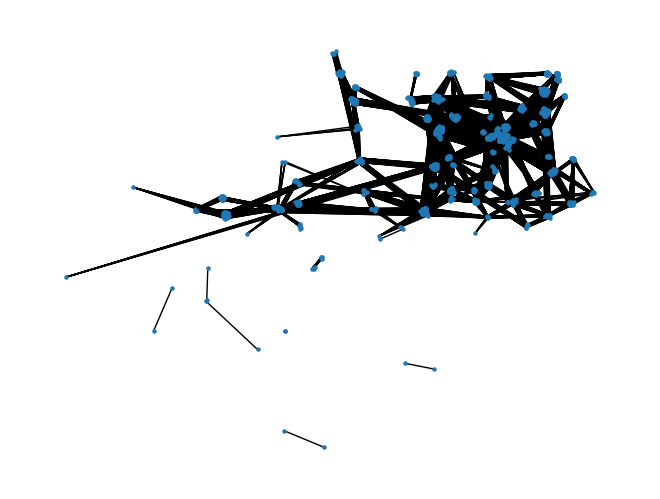

In [ ]:
nx.draw(G_mobike,pos=pos_mobike,node_size=5)

## 2.2 Use network analysis on the shared bike network

In [ ]:
# calculate the eigenvector_centrality

eigenvector_centrality_map = nx.algorithms.centrality.eigenvector_centrality(G_mobike,weight='weight')
print(eigenvector_centrality_map)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



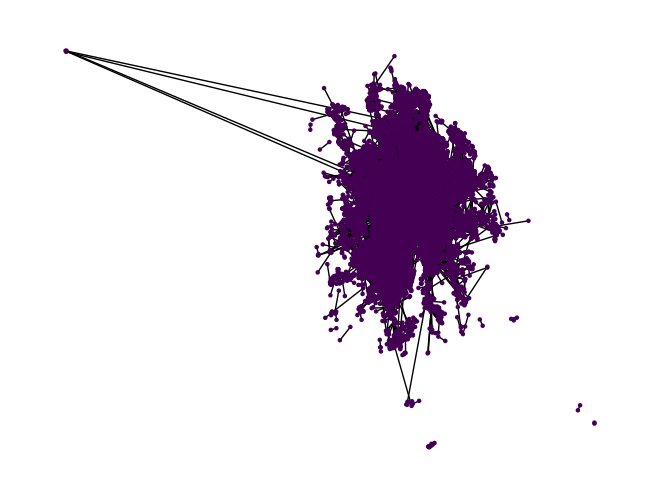

In [ ]:
nx.draw(G_mobike,pos=pos_mobike,node_size=5,node_color=list(eigenvector_centrality_map.values()))

In [ ]:
# all link of a graph
for link in G_mobike:
  #print(link)
  link

In [ ]:
# all node importance
for k in eigenvector_centrality_map:
  if eigenvector_centrality_map[k]>=0.001:
      print('coor:',k,', eigenvector:',eigenvector_centrality_map[k])

coor: 31.20104,121.48551 , eigenvector: 0.001889034250171427
coor: 31.19673,121.48141 , eigenvector: 0.002671497856379722
coor: 31.30796,121.50381 , eigenvector: 0.001889034250171427
coor: 31.30762,121.50895 , eigenvector: 0.002671497856379722
coor: 31.17455,121.41582 , eigenvector: 0.001889034250171427
coor: 31.16936,121.41202 , eigenvector: 0.002671497856379722
coor: 31.2772,121.50575 , eigenvector: 0.002671497856379722
coor: 31.28054,121.5071 , eigenvector: 0.001889034250171427
coor: 31.23673,121.54664 , eigenvector: 0.002671497856379722
coor: 31.23219,121.53801 , eigenvector: 0.001889034250171427
coor: 31.34064,121.44937 , eigenvector: 0.001889034250171427
coor: 31.33999,121.43737 , eigenvector: 0.002671497856379722
coor: 31.23288,121.52261 , eigenvector: 0.001889034250171427
coor: 31.20091,121.46763 , eigenvector: 0.002671497856379722
coor: 31.33739,121.43528 , eigenvector: 0.001889034250171427
coor: 31.33939,121.43626 , eigenvector: 0.002671497856379722
coor: 31.24966,121.36303 ,

In [ ]:
# todo: plot the data on the folium map
sh_lat = 31.22 
sh_lng = 121.46
gaode = 'http://wprd03.is.autonavi.com/appmaptile?style=7&x={x}&y={y}&z={z}' 
map_sh = folium.Map(location=[sh_lat,sh_lng],tiles=gaode, attr = 'basemap')

for k in eigenvector_centrality_map:
    lnglat = k.split(',')
    if eigenvector_centrality_map[k]>=0.001:
      folium.CircleMarker(
          [float(lnglat[0]),float(lnglat[1])],
          radius = eigenvector_centrality_map[k] * 200,
          # color = random_color(eigenvector_centrality_map[k]),
          fill=True
            ).add_to(map_sh)




In [ ]:
map_sh